In [1]:
import json
import deepdoctection as dd

In [2]:
page = dd.load_page("deepdocdetect_output.json")

/Users/jhoetter/deepdoctection/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
scale_x = 819 / 2481 # png width / root level width
scale_y = 1060 / 3508

Categories:
- table
- title
- text
- cell

In [4]:
annotations = {
    "tables": [],
    "titles": [],
    "texts": []
}

In [5]:
for annotation in page.annotations:
    if str(annotation.category_name) == 'LayoutType.table':
        annotations["tables"].append(annotation)
    elif str(annotation.category_name) == 'LayoutType.title':
        annotations["titles"].append(annotation)
    elif str(annotation.category_name) == 'LayoutType.text':
        annotations["texts"].append(annotation)

In [6]:
for key, list in annotations.items():
    print(key, len(list))

tables 1
titles 2
texts 1


In [7]:
len(page.annotations)

410

In [8]:
table_example = page.annotations[0]

In [9]:
title_example = page.annotations[1]

In [10]:
text_example = page.annotations[2]

In [11]:
cell_example = page.annotations[5]

In [12]:
with open("deepdocdetect_output.json", "r") as f:
    content = json.load(f)

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [14]:
example = annotations["tables"][0]

In [15]:
def get_table_values(table):
    table_relationships = table.relationships[next(iter(table.relationships))]
    annotation_id_to_value = {}
    for idx, annotation in enumerate(page.get_annotation(annotation_ids=table_relationships)):
        if len(annotation.relationships) > 0:
            for cell_annotation in page.get_annotation(
                annotation_ids=annotation.relationships[next(iter(annotation.relationships))]
            ):
                value = cell_annotation.sub_categories[next(iter(cell_annotation.sub_categories))].value
                annotation_id_to_value[cell_annotation.annotation_id] = value
    return annotation_id_to_value

In [16]:
def get_text_values(text):
    text_relationships = text.relationships[next(iter(text.relationships))]
    annotation_id_to_value = {}
    for annotation in page.get_annotation(annotation_ids=text_relationships):
        value = annotation.sub_categories[next(iter(annotation.sub_categories))].value
        annotation_id_to_value[annotation.annotation_id] = value
    return annotation_id_to_value

In [32]:
table_html_list = table_example.sub_categories[next(iter(table_example.sub_categories))].value
table_html = "\n".join(table_html_list)
for annotation_id, value in get_table_values(table_example).items():
    table_html = table_html.replace(annotation_id, value)
print(table_html)

<table>
<tr>
<td colspan=2>
a106b619-9588-3d9f-9f91-0b630d2d3cda
</td>
<td>
c578fd24-0e24-35f0-a41c-dec73c196f72
</td>
<td>
2d357af1-e89f-3da6-9e0d-e4106e320cf9
</td>
<td colspan=2>
713b7bf6-5d5c-3efb-9274-760cf149ccf4
</td>
</tr>
<tr>
<td colspan=2>
d54f8e4e-f575-3f5c-8aa2-aa2dc6407d3b
</td>
<td>
3e976430-9fce-3a8d-bac7-9e35eb05a838
</td>
<td>
9cb3f96d-976e-362f-964a-099ccd0003ea
</td>
<td colspan=2>
51101330-d5cd-3d5c-b60c-5962084490c5
</td>
</tr>
<tr>
<td>
</td>
<td>
</td>
<td rowspan=2 colspan=3>
dba8ec5b-975e-3f53-8086-4e25cc4ce42d
</td>
<td>
5f302af5-b78b-3c55-be1d-29a90ca35e8f
</td>
</tr>
<tr>
<td>
</td>
<td>
</td>
<td>
c9129183-4b72-38b1-bfd0-84a5d0a5beb7
</td>
</tr>
<tr>
<td colspan=2>
c69750e4-bdcd-346f-8b0a-15edbef5feae
</td>
<td>
b4369e8f-ed6c-38e9-934f-e6a5b1fb8c62
</td>
<td>
3cba14ed-98b6-3b00-b9e1-65957ae425f8
</td>
<td>
85f10ef5-147c-3823-89d8-2c57dcaa86d8
</td>
<td>
d5b03c9b-e55e-3ec9-952c-5cdb881dceb5
</td>
</tr>
<tr>
<td colspan=2>
928901bb-3229-360d-b9a9-ef9a9ea80ec

364.88944285272055 916.0574365178699
Rectangle(xy=(41.3986, 364.889), width=738.646, height=551.168, angle=0)


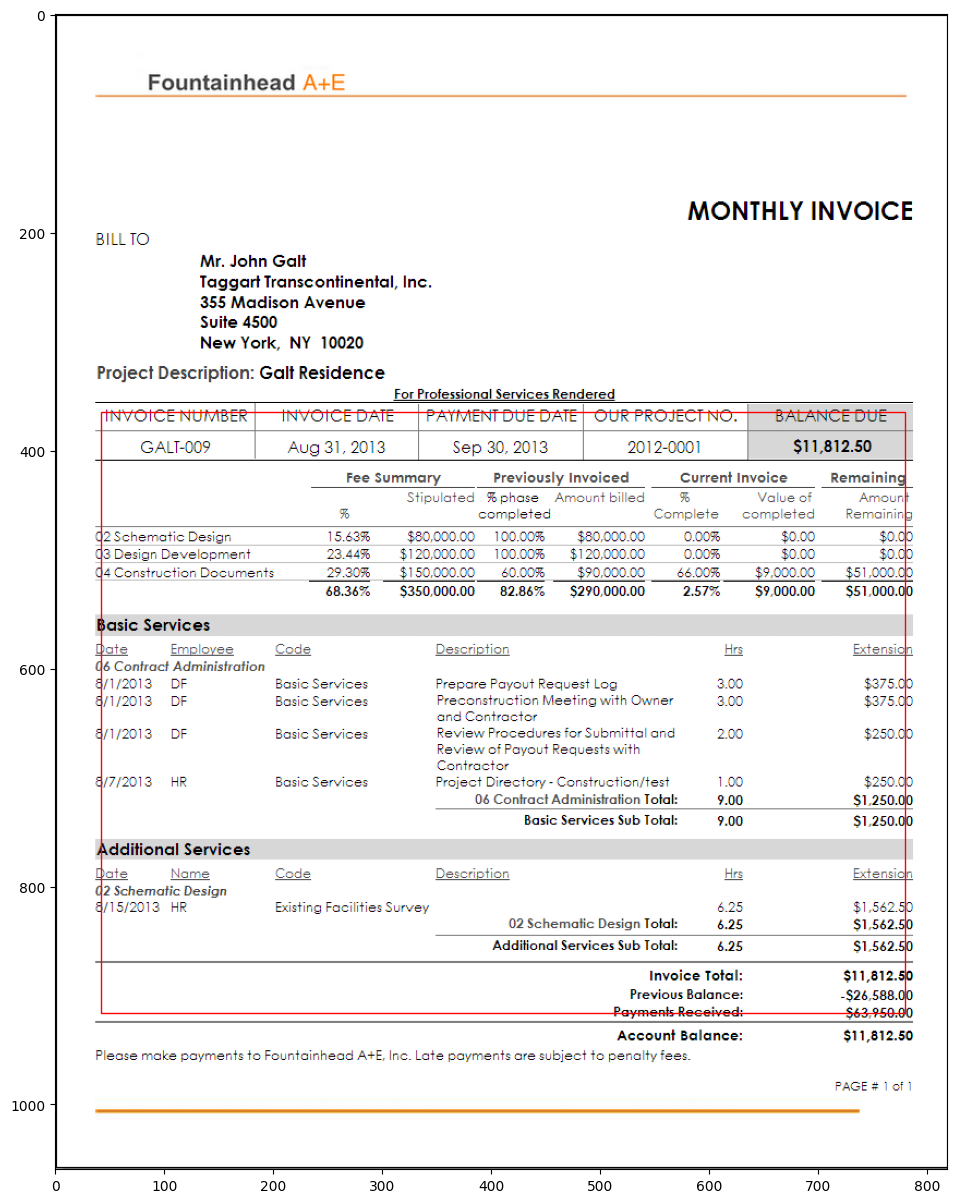

In [18]:
img = plt.imread("examples/invoice-1.png")
fig, ax = plt.subplots(1, figsize=(15, 15))

# Display the image
ax.imshow(img)

rows = [{
    'ulx': example.bounding_box.ulx * scale_x,
    'uly': example.bounding_box.uly * scale_y,
    'lrx': example.bounding_box.lrx * scale_x,
    'lry': example.bounding_box.lry* scale_y,
    "content": "wow"
}]
for box in rows:
    print(box['uly'], box['lry'])
    # rect = patches.Rectangle((box['position_x0'], box['position_y0']), box['position_x1']-box['position_x0'], box['position_y1']-box['position_y0'], linewidth=1, edgecolor='r', facecolor='none')
    rect = patches.Rectangle((box['ulx'], box['uly']), box['lrx']-box['ulx'], box['lry']-box['uly'], linewidth=1, edgecolor='r', facecolor='none')
    print(rect)
    ax.add_patch(rect)
    #ax.annotate(box['content'], (box['ulx'], box['uly']), fontsize=8, color='r')

# Show the image
plt.show()